In [12]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, TimeDistributed, Flatten, Conv1D, MaxPooling1D
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

from forecaster import Forecaster
import matplotlib.pyplot as plt
plt.style.use('default')

In [20]:
df = pd.read_csv('AAPL.csv', parse_dates = ['Date'])

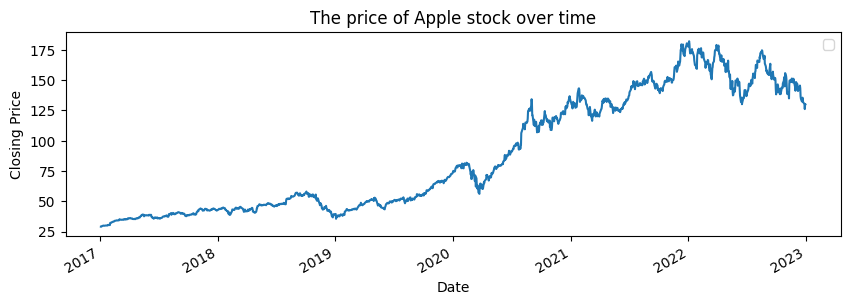

In [21]:
ax = df.plot(x='Date', y='Close', figsize = (10, 3))
ax.set_ylabel('Closing Price')
ax.set_title('The price of Apple stock over time')
ax.legend([])

In [22]:
df = df[['Date', 'Close']]

In [23]:
forecaster = Forecaster(
    df,
    x = 'Date',
    y = 'Close'
)

,Training score,Test score
XGBRegressor,0.680905,0.165406


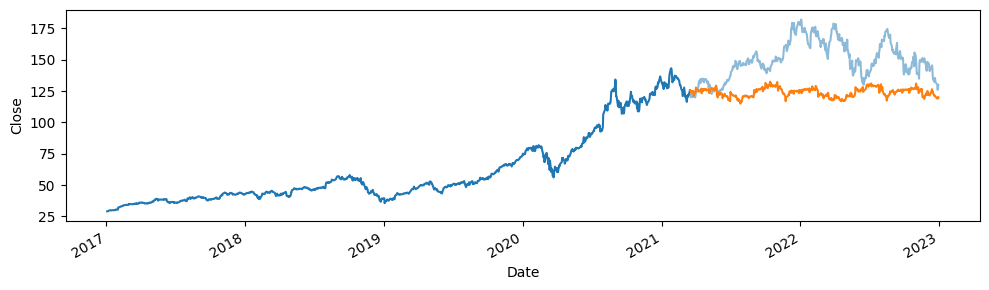

In [75]:
pred, score = forecaster.validate(XGBRegressor(), seasonality = True, plot = True)

,Training score,Test score
GRU,0.806367,0.118544


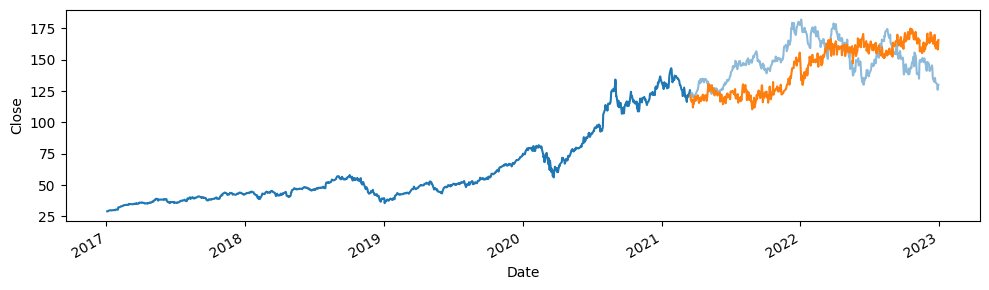

In [56]:
model = Sequential([
    GRU(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 60).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

,Training score,Test score
LSTM,0.745579,0.124097


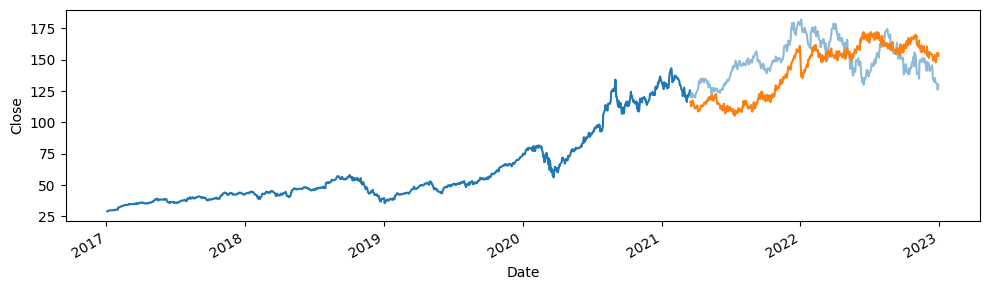

In [51]:
model = Sequential([
    LSTM(units = 60),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 60).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

,Training score,Test score
LSTM,0.804446,0.097168


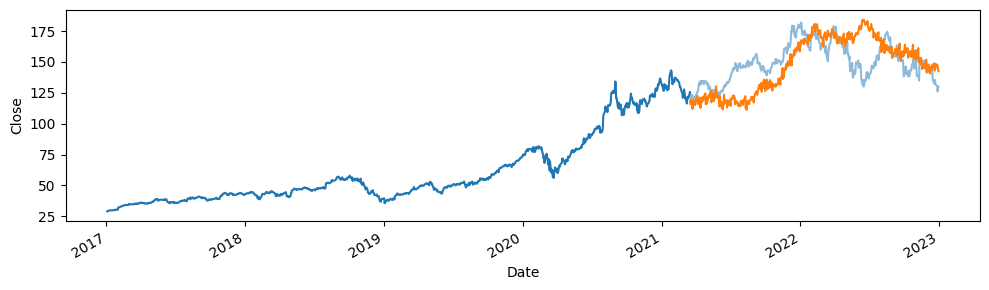

In [66]:
model = Sequential([
    LSTM(units = 60, return_sequences = True),
    Dropout(0.1),
    LSTM(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 60).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

,Training score,Test score
GRU,0.755334,0.101368


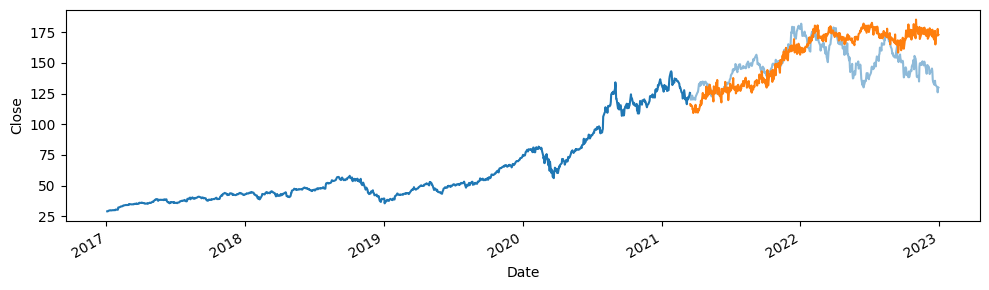

In [67]:
model = Sequential([
    GRU(units = 60, return_sequences = True),
    Dropout(0.1),
    GRU(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 60).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

,Training score,Test score
LSTM,0.754966,0.099473


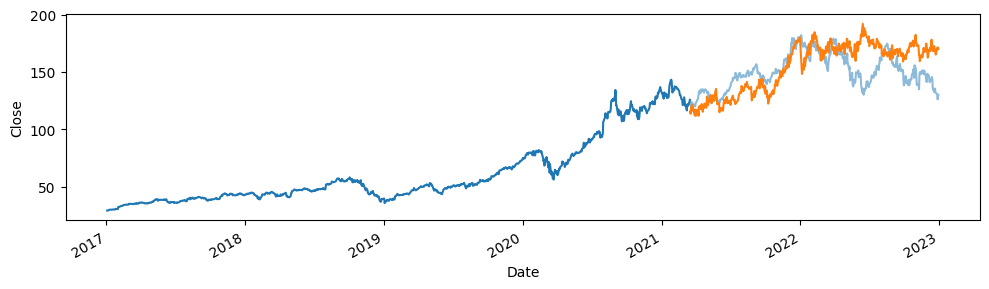

In [70]:
model = Sequential([
    LSTM(units = 60, return_sequences = True),
    Dropout(0.1),
    GRU(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM_GRU')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 60).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

,Training score,Test score
Conv1D,0.724086,0.176687


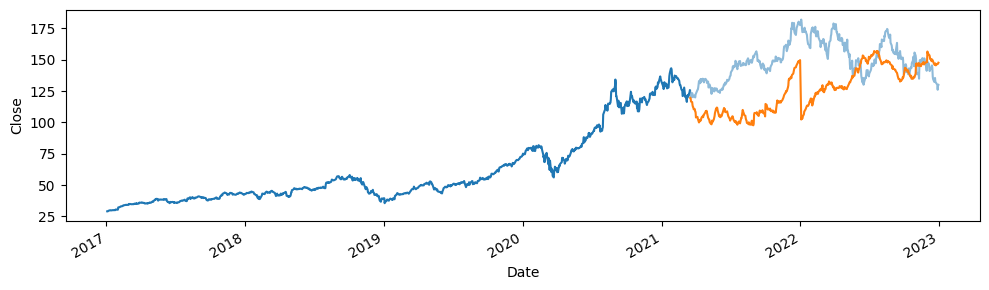

In [71]:
model = Sequential([
    Conv1D(filters = 128, kernel_size = 11, activation = 'relu'),
    MaxPooling1D(pool_size = 2),
    Flatten(),
    Dense(units = 1)
], name = 'CNN')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 7).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

,Training score,Test score
Conv1D,0.745556,0.191863


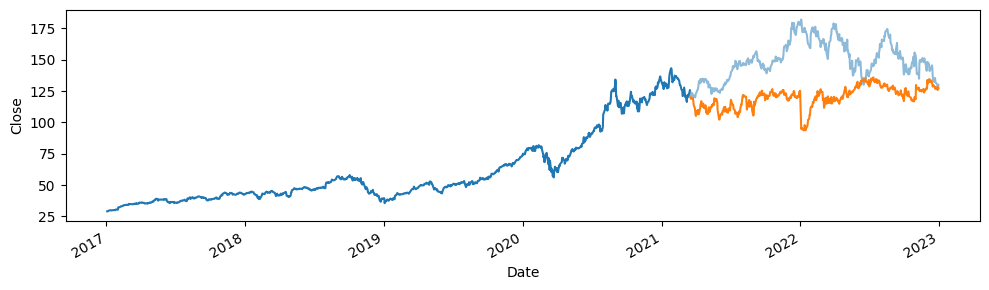

In [74]:
model = Sequential([
    Conv1D(filters = 128, kernel_size = 11, activation = 'relu'),
    MaxPooling1D(pool_size = 2),
    GRU(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'CNN')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 7).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

  0%|          | 0/453 [00:00<?, ?it/s]

,Training score,Test score
LSTM,0.719735,0.130725


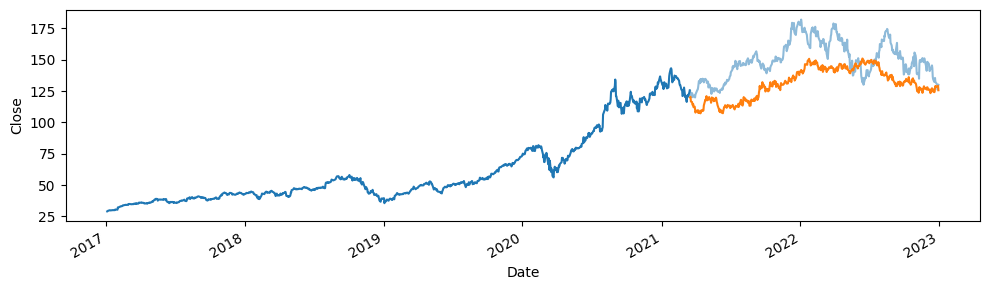

In [76]:
model = Sequential([
    LSTM(units = 60, return_sequences = True),
    Dropout(0.1),
    LSTM(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    lag = np.arange(1, 2).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

  0%|          | 0/453 [00:00<?, ?it/s]

,Training score,Test score
LSTM,0.70916,0.202577


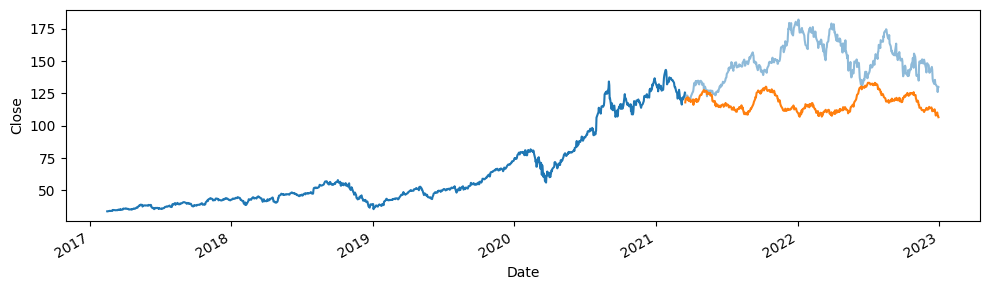

In [79]:
model = Sequential([
    LSTM(units = 60, return_sequences = True),
    Dropout(0.1),
    LSTM(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    lag = np.arange(1, 31).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

  0%|          | 0/453 [00:00<?, ?it/s]

,Training score,Test score
LSTM,0.733758,0.169853


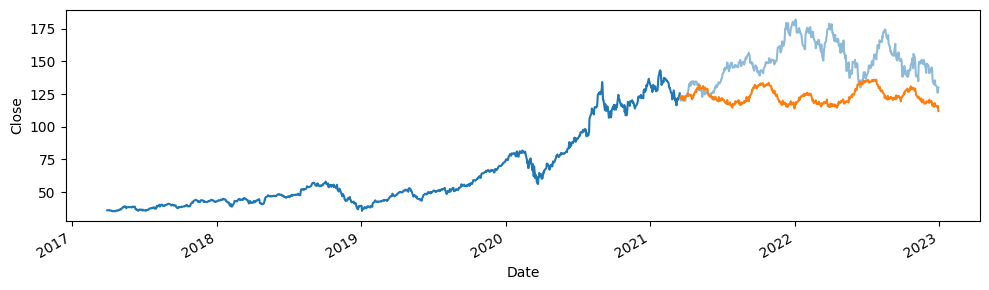

In [77]:
model = Sequential([
    LSTM(units = 60, return_sequences = True),
    Dropout(0.1),
    LSTM(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    lag = np.arange(1, 61).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

  0%|          | 0/453 [00:00<?, ?it/s]

,Training score,Test score
LSTM,0.694004,0.159931


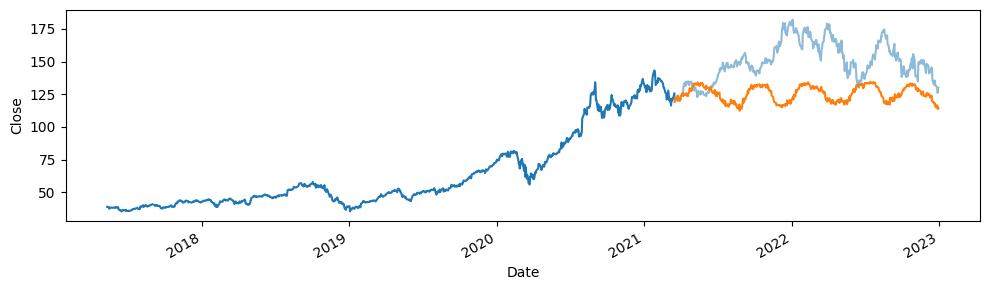

In [78]:
model = Sequential([
    LSTM(units = 60, return_sequences = True),
    Dropout(0.1),
    LSTM(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    lag = np.arange(1, 91).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)